___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
df = pd.read_csv('yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


** Check the head, info , and describe methods on yelp.**

In [4]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [3]:
df['text_length'] = df['text'].apply(len)

**Create a new column called "text length" which is the number of words in the text column.**

In [68]:
df.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

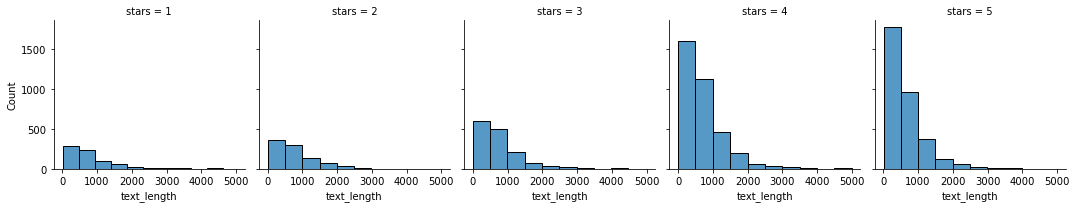

In [9]:
graph= sns.FacetGrid(col='stars',data=df)
graph.map(sns.histplot,'text_length',bins=10)

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

<AxesSubplot:xlabel='stars', ylabel='text_length'>

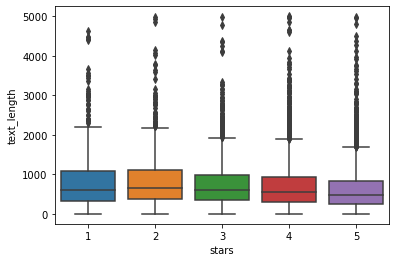

In [10]:
sns.boxplot(x='stars', y ='text_length', data=df)

**Create a boxplot of text length for each star category.**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '4'),
  Text(1, 0, '5'),
  Text(2, 0, '3'),
  Text(3, 0, '2'),
  Text(4, 0, '1')])

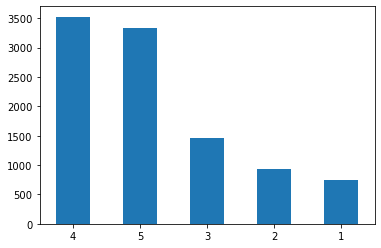

In [38]:

ax = df['stars'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

<AxesSubplot:xlabel='stars', ylabel='count'>

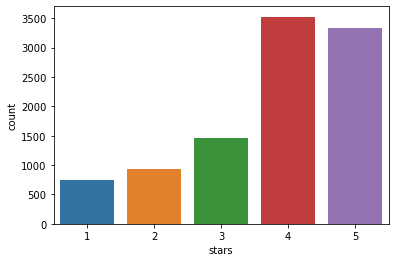

In [16]:
sns.countplot(x='stars', data =df)

**Create a countplot of the number of occurrences for each type of star rating.**

In [44]:
df.groupby('stars').mean().corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [45]:
# df2 = df.groupby('stars')
# df2.corr()

**Use the corr() method on that groupby dataframe to produce this dataframe:**

<AxesSubplot:>

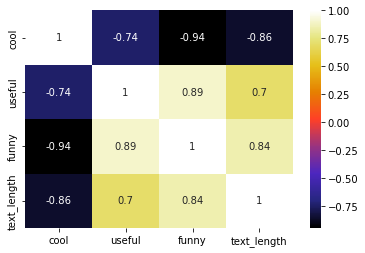

In [49]:
sns.heatmap(df.groupby('stars').mean().corr(),annot=True,fmt='.2g',cmap="CMRmap")

**Then use seaborn to create a heatmap based off that .corr() dataframe:**

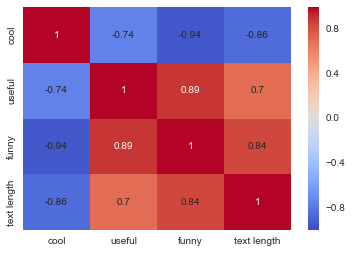

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [59]:
df3 = df.query('stars == 1 or stars==5').copy()

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [60]:
X = df3['text']
y = df3['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)


** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [67]:
from sklearn.model_selection import train_test_split

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
from sklearn.naive_bayes import MultinomialNB
multinb = MultinomialNB()

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [71]:
multinb.fit(X_train,y_train)

MultinomialNB()

**Now fit nb using the training data.**

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [72]:
pred = multinb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(confusion_matrix(y_test,pred),'\n', classification_report(y_test,pred))


[[159  69]
 [ 22 976]] 
               precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [95]:
from sklearn.feature_extraction.text import TfidfTransformer

** Import Pipeline from sklearn. **

In [77]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [96]:
pipeline=Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier',MultinomialNB())
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [100]:
X = df3['text']
y = df3['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [92]:
text_train

3608    I have found my new favorite sushi spot.\n\nI ...
2397    I have been exploring more of the park recentl...
6066    I've been taking mine and my family's cars to ...
7366    Absolutely waste of time & space is this estab...
5888    Ive been eating here more and more often latel...
                              ...                        
3902    The best tacos in the city, amazing veggies, a...
9570    This is the best buffet in Az. HUGE variety fr...
3333    We went here for my wife's birthday, and it's ...
3781    Loved it. Pulled pork & pulled chicken, bbq sa...
2071    I was inspired to visit Casella's after a cowo...
Name: text, Length: 2860, dtype: object

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [102]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [103]:
pred = pipeline.predict(X_test)


In [104]:
print(confusion_matrix(y_test,pred),'\n', classification_report(y_test,pred))

[[  0 228]
 [  0 998]] 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/marci/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
msg = df.text[0]

In [105]:
import string

In [107]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [130]:
nonpuc = [ele for ele in msg if ele not in string.punctuation]

In [131]:
nonpuc= "".join(nonpuc)

In [115]:
import nltk

In [117]:
# nltk.download_shell()

In [118]:
from nltk.corpus import stopwords

In [140]:
from nltk.stem.porter import PorterStemmer

In [141]:
ps = PorterStemmer()

In [134]:
nonpuc

'My wife took me here on my birthday for breakfast and it was excellent  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  Our waitress was excellent and our food arrived quickly on the semibusy Saturday morning  It looked like the place fills up pretty quickly so the earlier you get here the better\n\nDo yourself a favor and get their Bloody Mary  It was phenomenal and simply the best Ive ever had  Im pretty sure they only use ingredients from their garden and blend them fresh when you order it  It was amazing\n\nWhile EVERYTHING on the menu looks excellent I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete  It was the best toast Ive ever had\n\nAnyway I cant wait to go back'

In [143]:
clean_review = [ps.stem(ele) for ele in nonpuc.split() if ele.lower() not in stopwords.words('english')]

In [142]:
' '.join(clean_review)

'wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure waitress excellent food arrived quickly semibusy Saturday morning looked like place fills pretty quickly earlier get better favor get Bloody Mary phenomenal simply best Ive ever Im pretty sure use ingredients garden blend fresh order amazing EVERYTHING menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came 2 pieces griddled bread amazing absolutely made meal complete best toast Ive ever Anyway cant wait go back'

In [144]:
' '.join(clean_review)

'wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semibusi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ive ever im pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici came 2 piec griddl bread amaz absolut made meal complet best toast ive ever anyway cant wait go back'

In [145]:
def cleanReview(msg):
    '''
    remove the special character
    remove stem word
    using stopword remove regular word
    '''
    nonpuc = [ele for ele in msg if ele not in string.punctuation]
    nonpuc= "".join(nonpuc)
    clean_review = [ps.stem(ele) for ele in nonpuc.split() \
                    if ele.lower() not in stopwords.words('english')]
    return clean_review

In [149]:
df4 = df.copy()

In [151]:
df4.text = df4.text.apply(cleanReview)

In [152]:
df5 = df4.query('stars == 1 or stars==5').copy()


In [158]:
def join(lst):
    return ' '.join(lst)

In [171]:
df4.text = df4.text.apply(join)

In [176]:
X = df4['text']
y = df4['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
pipeline=Pipeline([
    ('bow', CountVectorizer()),
    ('classifier',MultinomialNB())
])

In [177]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [178]:
pred = pipeline.predict(X_test)


In [179]:
print(confusion_matrix(y_test,pred),'\n', classification_report(y_test,pred))

[[ 63  32  16  68  41]
 [ 13  19  42 172  27]
 [  3   8  46 328  58]
 [  4   5  21 769 265]
 [  6   2   7 443 542]] 
               precision    recall  f1-score   support

           1       0.71      0.29      0.41       220
           2       0.29      0.07      0.11       273
           3       0.35      0.10      0.16       443
           4       0.43      0.72      0.54      1064
           5       0.58      0.54      0.56      1000

    accuracy                           0.48      3000
   macro avg       0.47      0.34      0.36      3000
weighted avg       0.48      0.48      0.44      3000



In [168]:
print(confusion_matrix(y_test,pred),'\n', classification_report(y_test,pred))

[[  0 228]
 [  0 998]] 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
#exploring countvectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
factor = cv.fit_transform(df5.text)

In [188]:
factor.shape

(4086, 5000)

In [194]:
from sklearn.naive_bayes import GaussianNB

In [196]:
X = df5['text']
y = df5['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
pipeline=Pipeline([
    ('bow', CountVectorizer(max_features=5000,ngram_range=(1,3))),
    ('classifier',MultinomialNB())
])
pipeline.fit(X_train,y_train)
pred = pipeline.predict(X_test)
print(confusion_matrix(y_test,pred),'\n', classification_report(y_test,pred))

[[192  36]
 [ 50 948]] 
               precision    recall  f1-score   support

           1       0.79      0.84      0.82       228
           5       0.96      0.95      0.96       998

    accuracy                           0.93      1226
   macro avg       0.88      0.90      0.89      1226
weighted avg       0.93      0.93      0.93      1226



In [201]:
%%timeit
X_train, X_test, y_train, y_test = train_test_split(factor.toarray(), y, test_size=0.3, random_state=101)

268 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [200]:

nb = GaussianNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)
print(confusion_matrix(y_test,pred),'\n', classification_report(y_test,pred))

[[106 122]
 [113 885]] 
               precision    recall  f1-score   support

           1       0.48      0.46      0.47       228
           5       0.88      0.89      0.88       998

    accuracy                           0.81      1226
   macro avg       0.68      0.68      0.68      1226
weighted avg       0.81      0.81      0.81      1226



Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!